In [1]:
# First cell - Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Second cell
!pip install scikit-learn pandas matplotlib seaborn nltk

In [3]:
# Download SMS Spam Collection Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

# List files to verify
!ls -lh

--2025-11-24 20:29:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z     [ <=>                ] 198.65K  1.08MB/s    in 0.2s    

2025-11-24 20:29:46 (1.08 MB/s) - ‘smsspamcollection.zip’ saved [203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  
total 684K
drwx------ 5 root root 4.0K Nov 24 20:28 drive
-rw-r--r-- 1 root root 5.8K Apr 18  2011 readme
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 467K Mar 15  2011 SMSSpamCollection
-rw-r--r-- 1 root root 199K Nov 24 20:29 smsspamcollection.zip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Display first few rows
print("Dataset loaded successfully!")
print(f"Total messages: {len(df)}")
df.head()

Dataset loaded successfully!
Total messages: 5572


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Cell: Basic statistics
print("Dataset Overview:")
print(df.info())
print("\nLabel Distribution:")
print(df['label'].value_counts())
print("\nPercentages:")
print(df['label'].value_counts(normalize=True) * 100)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Percentages:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


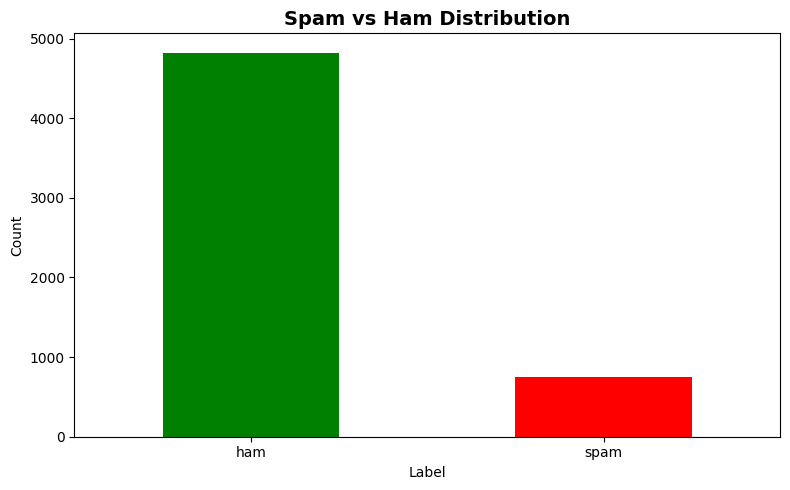

<Figure size 640x480 with 0 Axes>

In [6]:
# Cell: Visualize class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Spam vs Ham Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Save figure
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')

Average message length by type:
label
ham      71.482487
spam    138.670683
Name: message_length, dtype: float64


<Figure size 1000x500 with 0 Axes>

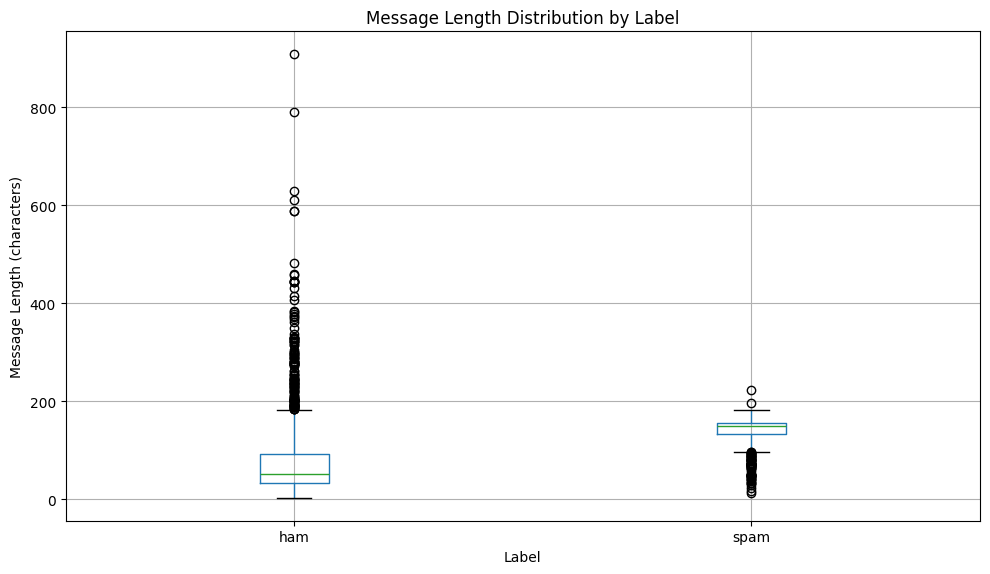

In [7]:
# Cell: Message length analysis
df['message_length'] = df['message'].apply(len)

print("Average message length by type:")
print(df.groupby('label')['message_length'].mean())

# Visualize
plt.figure(figsize=(10, 5))
df.boxplot(column='message_length', by='label', figsize=(10, 6))
plt.title('Message Length Distribution by Label')
plt.suptitle('')  # Remove default title
plt.xlabel('Label')
plt.ylabel('Message Length (characters)')
plt.tight_layout()
plt.show()


In [8]:
# Cell: Sample messages
print("Sample SPAM messages:")
print(df[df['label'] == 'spam']['message'].head(3).values)
print("\n" + "="*50 + "\n")
print("Sample HAM messages:")
print(df[df['label'] == 'ham']['message'].head(3).values)

Sample SPAM messages:
["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']


Sample HAM messages:
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 'U dun say so early hor... U c already then say...']
